<a href="https://colab.research.google.com/github/joieaurum/ArtificialNeuralNetworks/blob/master/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Deep Learning - subset of ML

Keras and Tensorflow

- Keras - Interface to Google's Tensorflow (deep learning library)
- CNTK Microsoft Cognitive Toolkit
- Francois Chollet - Google Mind team - deep learning capabilities accesible
- keras - experimenting with many models - finds the best 
** more data leads to better trained learning models
GPU and TPU - product of NVIDIA and GOOGLE
- Examples
      - DeepArt.io
      - skoltech.ru
      - image to image Demo
**Adversarial Networks





In [ ]:
# load the MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Data exploration

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train[0]

5

In [ ]:
X_train[0]
#values are given in terms of pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#Visualizing the digits

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

<function matplotlib.pyplot.tight_layout>

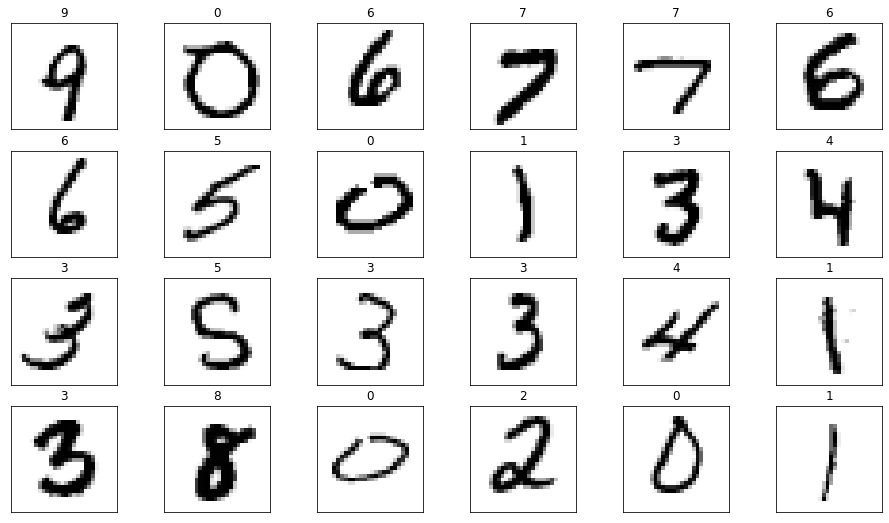

In [ ]:
index=np.random.choice(np.arange(len(X_train)), 24, replace=False)#taking 24 indices and when a number is picked its with no replacement
figur, axes= plt.subplots(nrows=4,ncols=6, figsize=(16,9))#create regions of 4 rows 6 columns
for item in zip (axes.ravel(),X_train[index], y_train[index]):
  axes, image,target=item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout

In [ ]:
#Data Preparation
#sckit-learn's bundles dataset are preprocessed into shapes that models will accept
# Data from keras needs preprocessing
#for it to be used in keras convolutional network
#each sample must have the shape(width,height,channels) example:(28,28,1) grayscale images
#as the model learns from the images, it creates many more channels - edges, curves, lines

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#reshape
X_train =X_train.reshape((60000,28,28,1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test=X_test.reshape((10000,28,28,1))

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train[0]
#values are pixel representation

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
#Normalize the image data because deep learning performs better on data that is normalized (0-1,0)
#or a range for which the data mean is 0.0 and its standard deviation is 1.0

In [ ]:
X_train=X_train.astype('float32')/255 #RGB = 0.0.0

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
t=np.arange(2,10)

In [ ]:
t

array([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
t=t.astype('float32')/9

In [ ]:
t

array([0.22222222, 0.33333334, 0.44444445, 0.5555556 , 0.6666667 ,
       0.7777778 , 0.8888889 , 1.        ], dtype=float32)

In [ ]:
X_test=X_test.astype('float32')/255

In [ ]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
# one hot encoding

In [ ]:
y_test[0]

7

In [ ]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#predictions for each digit will be an array of 10 probabilities

In [ ]:
#to evaluate model accuracy, keras compares predictions to the dataset labels

In [ ]:
#hence the dataset must be of the same shape

In [ ]:
#mnist - 0-9,,therefore we must transform labels into categorical data arrays - so that they can musch the prediction format

In [ ]:
#one hot encoding converts labels into intergers using 10 element arrays of 1.0 and 0.0:
#0 1 2 3 4 5 6 7 8 9
#0 0 0 0 0 0 0 1 0 0,,,now we convert the answe that was given a 7 a 1(these are probabilities)
# there is a function is keras that helps you in performing one hot encoding
# now we convert y_train, y_test into 2D array of categorical data

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test=to_categorical(y_test)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#Now creating a Neural Network